In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing import sequence
from sklearn.model_selection import train_test_split
from keras import layers
from keras.models import Model

In [ ]:
data = pd.read_csv("ner_dataset.csv", encoding="latin1")


data.head(50)

,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,NaN,of,IN,O
2,NaN,demonstrators,NNS,O
3,NaN,have,VBP,O
4,NaN,marched,VBN,O
5,NaN,through,IN,O
6,NaN,London,NNP,B-geo
7,NaN,to,TO,O
8,NaN,protest,VB,O
9,NaN,the,DT,O


In [ ]:


data = data.fillna(method="ffill")


data.head(50)


print("Unique words in corpus:", data['Word'].nunique())
print("Unique tags in corpus:", data['Tag'].nunique())

Unique words in corpus: 35178
Unique tags in corpus: 17


In [ ]:

words=list(data['Word'].unique())
words.append("ENDPAD")
tags=list(data['Tag'].unique())


print("Unique tags are:", tags)

Unique tags are: ['O', 'B-geo', 'B-gpe', 'B-per', 'I-geo', 'B-org', 'I-org', 'B-tim', 'B-art', 'I-art', 'I-per', 'I-gpe', 'I-tim', 'B-nat', 'B-eve', 'I-eve', 'I-nat']


In [ ]:
num_words = len(words)
num_tags = len(tags)


num_words

35179

In [ ]:
class SentenceGetter(object):
    def __init__(self, data):
        self.n_sent = 1
        self.data = data
        self.empty = False
        agg_func = lambda s: [(w, p, t) for w, p, t in zip(s["Word"].values.tolist(),
                                                           s["POS"].values.tolist(),
                                                           s["Tag"].values.tolist())]
        self.grouped = self.data.groupby("Sentence #").apply(agg_func)
        self.sentences = [s for s in self.grouped]

    def get_next(self):
        try:
            s = self.grouped["Sentence: {}".format(self.n_sent)]
            self.n_sent += 1
            return s
        except:
            return None


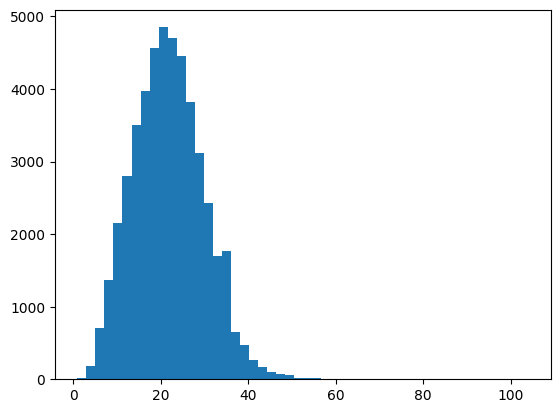

In [ ]:
getter = SentenceGetter(data)
sentences = getter.sentences


len(sentences)


sentences[0]


word2idx = {w: i + 1 for i, w in enumerate(words)}
tag2idx = {t: i for i, t in enumerate(tags)}


word2idx


plt.hist([len(s) for s in sentences], bins=50)
plt.show()

In [ ]:

X1 = [[word2idx[w[0]] for w in s] for s in sentences]


type(X1[0])


X1[0]


[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 10,
 16,
 2,
 17,
 18,
 19,
 20,
 21,
 22]

In [ ]:
max_len = 50
nums = [[1], [2, 3], [4, 5, 6]]
sequence.pad_sequences(nums)


nums = [[1], [2, 3], [4, 5, 6]]
sequence.pad_sequences(nums,maxlen=2)


X = sequence.pad_sequences(maxlen=max_len,
                  sequences=X1, padding="post",
                  value=num_words-1)


X[0]

array([    1,     2,     3,     4,     5,     6,     7,     8,     9,
          10,    11,    12,    13,    14,    15,    10,    16,     2,
          17,    18,    19,    20,    21,    22, 35178, 35178, 35178,
       35178, 35178, 35178, 35178, 35178, 35178, 35178, 35178, 35178,
       35178, 35178, 35178, 35178, 35178, 35178, 35178, 35178, 35178,
       35178, 35178, 35178, 35178, 35178], dtype=int32)

In [ ]:

y1 = [[tag2idx[w[2]] for w in s] for s in sentences]


y = sequence.pad_sequences(maxlen=max_len,
                  sequences=y1,
                  padding="post",
                  value=tag2idx["O"])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, random_state=1)
X_train[0]
y_train[0]

array([0, 0, 0, 0, 1, 4, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 5, 6, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int32)

In [ ]:
input_word = layers.Input(shape=(max_len,))
# Write your code here
embedding_layers = layers.Embedding(input_dim = num_words,
                                    output_dim = 50,
                                    input_length=max_len)(input_word)
dropout_layers = layers.SpatialDropout1D(0.1)(embedding_layers)
bidirectional_lstm = layers.Bidirectional(layers.LSTM(units=100, return_sequences=True, recurrent_dropout=0.1))(dropout_layers)
output = layers.TimeDistributed(layers.Dense(num_tags, activation="softmax"))(bidirectional_lstm)
model = Model(input_word, output)




In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 50)]              0         
                                                                 
 embedding (Embedding)       (None, 50, 50)            1758950   
                                                                 
 spatial_dropout1d (Spatial  (None, 50, 50)            0         
 Dropout1D)                                                      
                                                                 
 bidirectional (Bidirection  (None, 50, 200)           120800    
 al)                                                             
                                                                 
 time_distributed (TimeDist  (None, 50, 17)            3417      
 ributed)                                                        
                                                             

In [ ]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
history = model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),batch_size=64, epochs=3,)

Epoch 1/3
600/600 [==============================] - 227s 360ms/step - loss: 0.2554 - accuracy: 0.9454 - val_loss: 0.1050 - val_accuracy: 0.9720
Epoch 2/3
600/600 [==============================] - 213s 355ms/step - loss: 0.0699 - accuracy: 0.9803 - val_loss: 0.0594 - val_accuracy: 0.9830
Epoch 3/3
600/600 [==============================] - 208s 347ms/step - loss: 0.0455 - accuracy: 0.9866 - val_loss: 0.0525 - val_accuracy: 0.9847


In [ ]:
metrics = pd.DataFrame(model.history.history)
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.255379,0.945363,0.104959,0.972031
1,0.069911,0.980330,0.059443,0.983002
2,0.045471,0.986617,0.052512,0.984679


<Axes: >

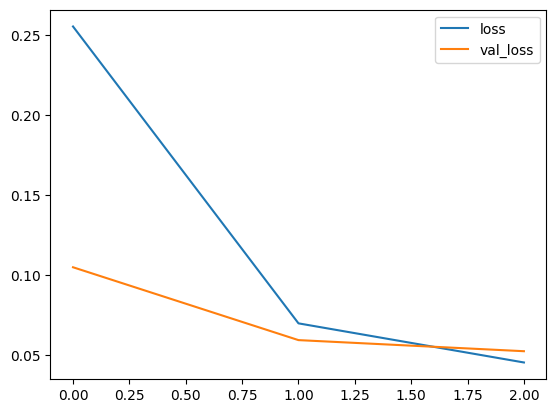

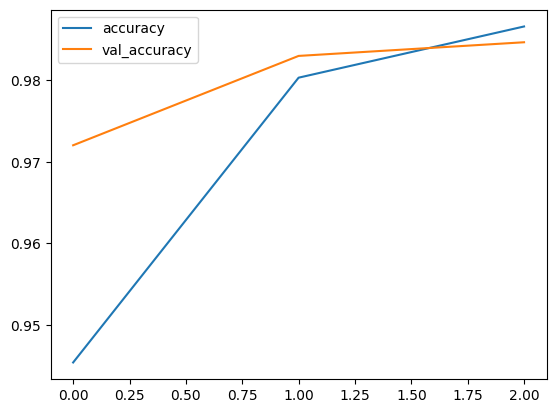

In [ ]:
metrics[['loss','val_loss']].plot()
metrics[['accuracy','val_accuracy']].plot()

In [ ]:
i = 23
p = model.predict(np.array([X_test[i]]))
p = np.argmax(p, axis=-1)
y_true = y_test[i]
print("{:15}{:5}\t {}\n".format("Word", "True", "Pred"))
print("-" *30)
for w, true, pred in zip(X_test[i], y_true, p[0]):
    print("{:15}{}\t{}".format(words[w-1], tags[true], tags[pred]))

1/1 [==============================] - 1s 749ms/step
Word           True 	 Pred

------------------------------
Wal-Mart       B-org	O
has            O	O
1.2            O	O
million        O	O
employees      O	O
who            O	O
operate        O	O
3,500          O	O
stores         O	O
in             O	O
the            O	O
United         B-geo	B-geo
States         I-geo	I-geo
,              O	O
Canada         B-geo	B-geo
,              O	O
China          B-geo	B-geo
,              O	O
Mexico         B-geo	B-geo
,              O	O
Brazil         B-geo	B-geo
,              O	O
Germany        B-geo	B-geo
,              O	O
the            O	O
United         B-geo	B-geo
Kingdom        I-geo	I-geo
,              O	O
and            O	O
South          B-geo	B-geo
Korea          I-geo	I-geo
.              O	O
Bermel         O	O
Bermel         O	O
Bermel         O	O
Bermel         O	O
Bermel         O	O
Bermel         O	O
Bermel         O	O
Bermel         O	O
Bermel         O	O
Bermel         O	